In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os, sys, datetime, time, random, fnmatch, math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import skimage.metrics

import datasets, custom_transforms
import torchvision.transforms as transforms
import torchvision.utils as vutils

path_to_save_images = Path('G:/DanielLam/JSRT/HQ_JSRT_and_BSE-JSRT/177-20-20 split/test_LowRes')
path_to_save_images.mkdir(parents=True, exist_ok=True)

main_file_directory = "G:/DanielLam/JSRT/HQ_JSRT_and_BSE-JSRT/177-20-20 split/test/"
file_sets = ["normal","suppressed"]
sample_keys_images = ["source", "boneless"]
total_epochs = 1 # 200 images in the original training dataset

composed_transforms = transforms.Compose([
    #custom_transforms.HistogramEqualisation(sample_keys_images),
    #custom_transforms.RandomAutocontrast(sample_keys_images, cutoff_limits=(0.1,0.1)),
    custom_transforms.Resize(sample_keys_images,256),
    #custom_transforms.CenterCrop(sample_keys_images,256),
    #custom_transforms.RandomHorizontalFlip(sample_keys_images, 0.5),
    #custom_transforms.RandomAffine(sample_keys_images, degrees=10,translate=(0.1,0.1),scale=(0.9,1.1)),
    custom_transforms.ToTensor(sample_keys_images),
    #custom_transforms.ImageComplement(sample_keys_images),
                                    ])

ds = datasets.JSRT_CXR(os.path.join(main_file_directory,file_sets[0]), 
                       os.path.join(main_file_directory, file_sets[1]), 
                       transform=composed_transforms)

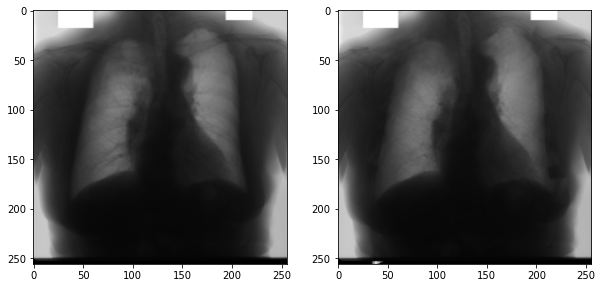

Complete.


In [2]:

counter=0
for epoch in range(total_epochs):
    for count, sample in enumerate(ds):
        try:
            #savename = sample["Patient"]+"-"+str(counter)+".png"
            savename = sample["Patient"]+".png"
        except:
            savename = str(counter)+".png"
        vutils.save_image( sample["source"], os.path.join(path_to_save_images, "normal", savename))
        vutils.save_image( sample["boneless"], os.path.join(path_to_save_images, "suppressed", savename))
        counter+=1
        
    # For each epoch, visual 
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(np.squeeze(sample["source"].numpy()),cmap="gray")
    ax[1].imshow(np.squeeze(sample["boneless"].numpy()),cmap="gray")
    plt.show()
print("Complete.")

In [3]:
for a,b, in enumerate(ds):
    print(a)
    print(b)

0
{'source': tensor([[[0.4000, 0.6235, 0.6706,  ..., 0.5529, 0.2745, 0.0314],
         [0.6431, 0.6824, 0.6941,  ..., 0.6353, 0.5765, 0.3176],
         [0.6980, 0.7020, 0.7059,  ..., 0.6706, 0.6510, 0.6039],
         ...,
         [0.5765, 0.5843, 0.5961,  ..., 0.6902, 0.6784, 0.6510],
         [0.5529, 0.5608, 0.5686,  ..., 0.6667, 0.6353, 0.5765],
         [0.5216, 0.5373, 0.5451,  ..., 0.6196, 0.5725, 0.3961]]]), 'boneless': tensor([[[0.4000, 0.6235, 0.6706,  ..., 0.5529, 0.2745, 0.0314],
         [0.6431, 0.6824, 0.6941,  ..., 0.6353, 0.5765, 0.3176],
         [0.6980, 0.7020, 0.7020,  ..., 0.6667, 0.6510, 0.6000],
         ...,
         [0.5765, 0.5843, 0.5961,  ..., 0.6863, 0.6784, 0.6510],
         [0.5529, 0.5608, 0.5686,  ..., 0.6667, 0.6353, 0.5765],
         [0.5216, 0.5373, 0.5451,  ..., 0.6196, 0.5725, 0.3961]]]), 'Patient': 'JPCLN008'}
1
{'source': tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.00

10
{'source': tensor([[[0.8549, 0.7843, 0.7294,  ..., 0.6706, 0.6706, 0.6706],
         [0.8706, 0.7922, 0.7333,  ..., 0.6706, 0.6706, 0.6706],
         [0.8706, 0.7922, 0.7333,  ..., 0.6706, 0.6706, 0.6706],
         ...,
         [0.0824, 0.0157, 0.0353,  ..., 0.1059, 0.0863, 0.0353],
         [0.0745, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0706, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]), 'boneless': tensor([[[0.8549, 0.7843, 0.7294,  ..., 0.6706, 0.6706, 0.6706],
         [0.8706, 0.7922, 0.7333,  ..., 0.6706, 0.6706, 0.6706],
         [0.8706, 0.7922, 0.7333,  ..., 0.6706, 0.6706, 0.6706],
         ...,
         [0.0824, 0.0157, 0.0392,  ..., 0.1098, 0.0863, 0.0392],
         [0.0745, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0706, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]), 'Patient': 'JPCLN141'}
11
{'source': tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.